# Лабораторная работа 1
## Задача о падении тела. Построение графиков функций

## Куницкий Тимофей Александрович, 18.03.2025

## Задание 3.1а

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [30]:
%matplotlib widget


In [31]:
def y(x):
    return np.sin(x)**4

In [32]:
x_min = 1.
x_max = 5.
step = 0.05
x_array = np.arange(x_min,x_max,step)
y_array = y(x_array)


In [33]:
matrix = np.transpose([x_array, y_array])


(0.5, 5.5, -0.499999995004082, 1.4996930655910048)

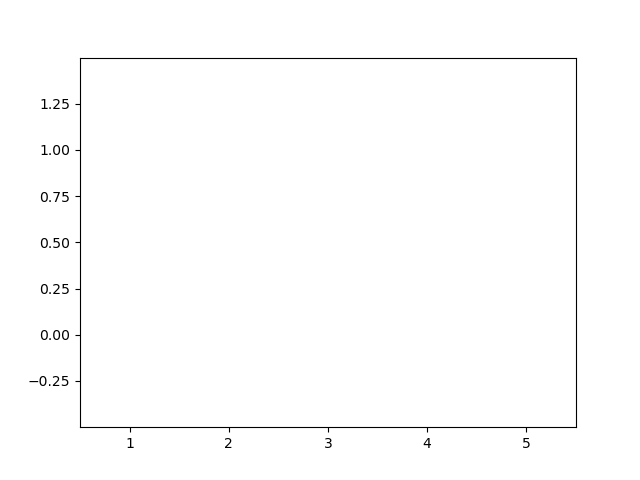

In [34]:
y_min, y_max = np.min(y_array), np.max(y_array)
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])

In [35]:
line1, = ax1.plot([],[],'b') 
print(type(line1))
line1.get_xdata(), line1.get_ydata()


<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

In [36]:
def at_frame1(point):
    """добавляет к объекту line1 точку с координатами (point[0],point[1])
    Arguments :
    point : массив из двух элементов
    Returns : None
    """
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())
    x_coord.append(point[0])
    y_coord.append(point[1])

    line1.set_data(x_coord, y_coord)   


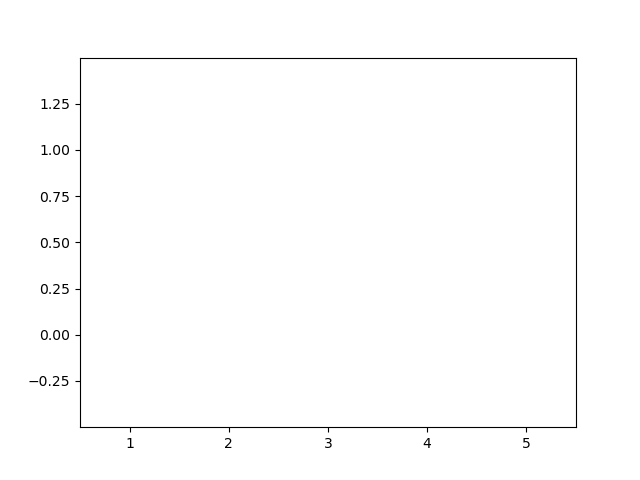

In [37]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=15)

In [10]:
plt.close('all')

## Задание 3.1б

In [11]:
t = np.arange(-6, 0, 0.01)
x1_array = 1 / np.tan(2 * np.exp(t))
y1_array = np.log(np.tan(np.exp(t)))


In [12]:
matrix = np.transpose([x1_array, y1_array])


(-0.9338031939566919, 202.21274424220888, -6.49999795192628, 0.921234961692746)

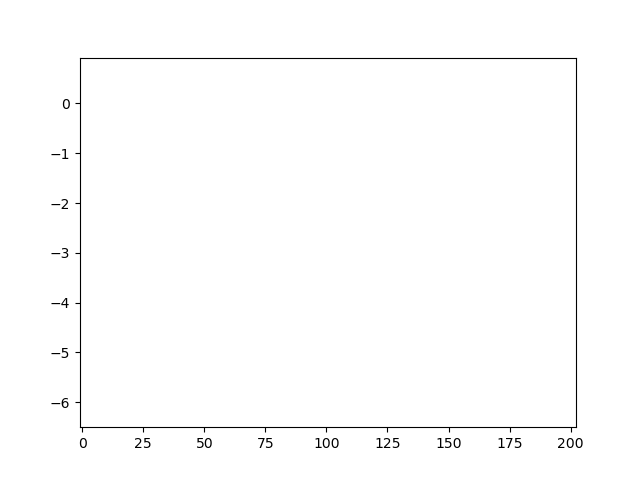

In [13]:
x1_min,x1_max,y1_min, y1_max =np.min(x1_array),np.max(x1_array), np.min(y1_array), np.max(y1_array)
ax1 = plt.axes()
plt.axis([x1_min-0.5, x1_max+0.5, y1_min-0.5, y1_max+0.5])

In [14]:
def at_frame1(point):
    """добавляет к объекту line1 точку с координатами (point[0],point[1])
    Arguments :
    point : массив из двух элементов
    Returns : None
    """
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())
    x_coord.append(point[0])
    y_coord.append(point[1])
    print()
    line1.set_data(x_coord, y_coord)   

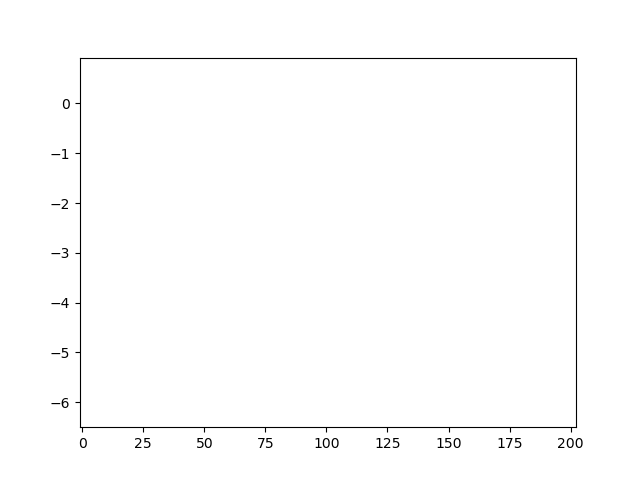

In [15]:

fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x1_min-0.5, x1_max+0.5, y1_min-0.5, y1_max+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=3)
  

In [16]:

plt.close('all')

## Задание 3.2. Движение точки по линии на плоскости

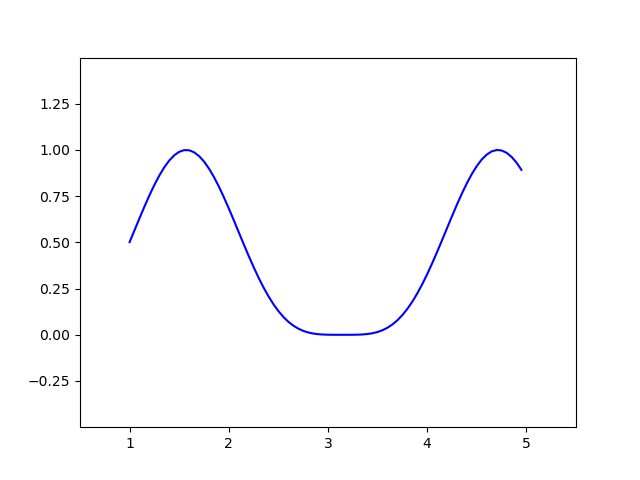

In [17]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax2.plot(x_array, y_array,'b')  # объект для графика функции
line2, = ax2.plot([], [],'go') # объект для точки
matrix = np.transpose([x_array, y_array])

In [18]:
def at_frame2(point):
    """задает объект line2 точкой с координатами (point[0],point[1])
    Arguments :
    point : массив из двух элементов
    Returns : None
    """
    line2.set_data([point[0]],[point[1]])

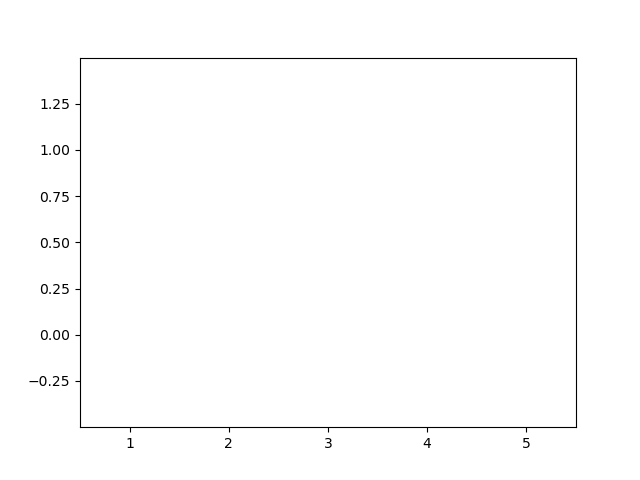

In [19]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
def init():
    """создает начальное состояние графической области"""
    global line2 # переменная сделана глобальной, чтобы она могла изменяться вну
    line1, = ax2.plot(x_array, y_array,'b')  
    line2, = ax2.plot([], [],'go') 
    plt.legend([r'$y(x) = \sin(x)^4$','Мovable point'])
FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init, 
repeat=False, interval=20)

In [20]:
plt.close('all')

## Задание 3.2 б

In [21]:
matrix=np.transpose([x1_array,y1_array])
line1, = ax2.plot(x1_array, y1_array,'b')  # объект для графика функции
line2, = ax2.plot([], [],'go')

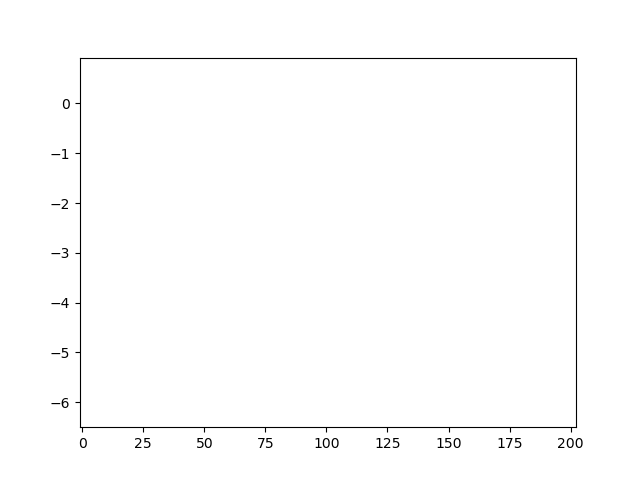

In [22]:
def at_frame2(point):
    line2.set_data([point[0]],[point[1]])
fig2 = plt.figure()
ax2=plt.axes()
plt.axis([x1_min-0.5, x1_max+0.5, y1_min-0.5, y1_max+0.5])
def init():
    """создает начальное состояние графической области"""
    global line2 # переменная сделана глобальной, чтобы она могла изменяться вну
    line1, = ax2.plot(x1_array, y1_array,'b')  
    line2, = ax2.plot([], [],'go') 
    plt.legend([r'$y(x) = \sin(x)^4$','Мovable point'])
FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init, 
repeat=False, interval=3)

In [23]:
plt.close('all')

##  3.3. Движение секущей прямой к заданной линии на плоскости


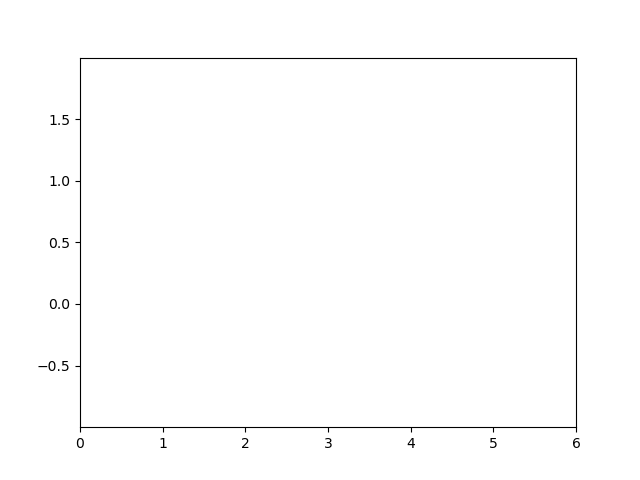

In [24]:
import sympy
fig3 = plt.figure()
ax3 = plt.axes()
matrix=np.transpose([x_array,y_array])
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])
def init():
    global point_B, secant_line # переменные сделаны глобальными, чтобы они были

    curve, = ax3.plot(x_array, y_array,'b') # графический объект для исходной фу

    A = np.array([x_array[0], y_array[0]])
    point_A, = ax3.plot(A[0],A[1],'ro') # графический объект для неподвижной точ

    B = np.array([x_array[-1], y_array[-1]])
    point_B, = ax3.plot(B[0],B[1],'go') # графический объект для подвижной точки

    secant_p = [A + (B - A)*t for t in [-2, 2]] # две точки секущей прямой, прох
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1],'g') # графический объе

    plt.legend([r'$y(x) = \sin(x)^4$','Unmovable point A','Мovable point B','Sec'])
def at_frame3(point):
    A = np.array([x_array[0], y_array[0]])
    B = np.array([point[0],point[1]])
    point_B.set_data([point[0]],[point[1]])
    if B[0]==A[0]:
        
        t = sympy.Symbol('t')
        y_x=sympy.sin(t)**4
        y_difx = sympy.diff(y_x, t) 
        k=y_difx.subs(t, A[0])
        y_kasstart = np.array([A[0],A[1]])
        y_kasend = np.array([A[0]+1,k+A[1]])
        y_kas=[y_kasstart+ (y_kasend-y_kasstart)*t for t in [-8, 8]]
        y_kas = np.array(y_kas)
        
        secant_line.set_data(y_kas[:,0], y_kas[:,1])
        secant_line.set_color('r')
    else:
        secant_p = [A + (B - A)*l for l in [-2, 2]] # две точки секущей прямой, прох
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:,0], secant_p[:,1])
FuncAnimation(fig3, at_frame3, frames=matrix[::-1], init_func=init, repeat=False, interval=20)


In [25]:
plt.close('all')

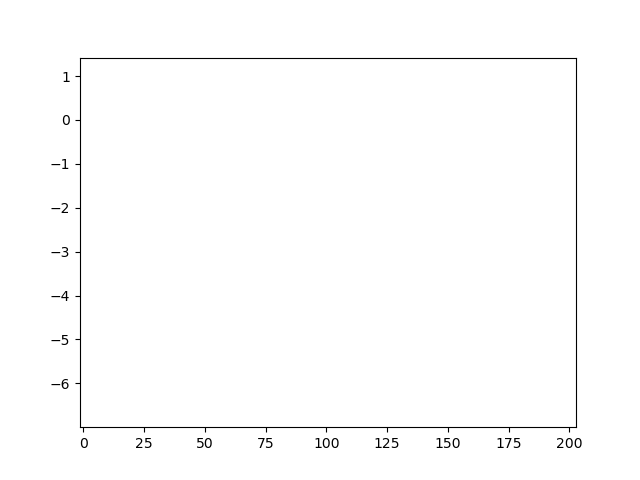

In [38]:
import sympy
fig4 = plt.figure()
ax4 = plt.axes()
matrix=np.transpose([x1_array,y1_array])
plt.axis([x1_min-1, x1_max+1, y1_min-1, y1_max+1])
def init():
    global point_B, secant_line # переменные сделаны глобальными, чтобы они были

    curve, = ax4.plot(x1_array, y1_array,'b') # графический объект для исходной фу

    A = np.array([x1_array[0], y1_array[0]])
    point_A, = ax4.plot(A[0],A[1],'ro') # графический объект для неподвижной точ

    B = np.array([x1_array[-1], y1_array[-1]])
    point_B, = ax4.plot(B[0],B[1],'go') # графический объект для подвижной точки

    secant_p = [A + (B - A)*t for t in [-2, 2]] # две точки секущей прямой, прох
    secant_p = np.array(secant_p)
    secant_line, = ax4.plot(secant_p[:,0], secant_p[:,1],'g') # графический объе

    plt.legend([r'$y(x) = \sin(x)^4$','Unmovable point A','Мovable point B','Sec'])
def at_frame4(point):
    A = np.array([x1_array[0], y1_array[0]])
    B = np.array([point[0],point[1]])
    point_B.set_data([point[0]],[point[1]])
    if B[0]==A[0]:
        t = sympy.Symbol('t')
        x_d=1 / sympy.tan(2 * sympy.exp(t))
        y_d = sympy.log(sympy.tan(sympy.exp(t)))
        x_difx = sympy.diff(x_d, t)
        y_difx = sympy.diff(y_d, t) 
        k=y_difx.subs(t, A[1])/x_difx.subs(t, A[0])
        y_kasstart = np.array([A[0],A[1]])
        y_kasend = np.array([A[0]+1,k+A[1]])
        y_kas=[y_kasstart+ (y_kasend-y_kasstart)*t for t in [-30, 30]]
        y_kas = np.array(y_kas)
        secant_line.set_data(y_kas[:,0], y_kas[:,1])
        secant_line.set_color('r')
    else:
        secant_p = [A + (B - A)*l for l in [-2, 2]] # две точки секущей прямой, прох
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:,0], secant_p[:,1])
FuncAnimation(fig4, at_frame4, frames=matrix[::-1], init_func=init, repeat=False, interval=3)

In [27]:
plt.close('all')